In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 80)

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
stopwords_eng = stopwords.words('english')

# Import Data

In [4]:
tweets_df = pd.read_csv('Data/tweets_election.csv')
tweets_df.drop(tweets_df.columns[0], axis=1, inplace=True)

In [5]:
tweets_df.drop_duplicates('text', keep='first', inplace=True)
tweets_df.reset_index(drop=True, inplace=True)

In [6]:
tweets_df.head()

geo  \
0  NaN   
1  NaN   
2  NaN   
3  NaN   
4  NaN   

                                                                              text  \
0   After the confrontation that cost Walter Wallace Jr. his life set off prote...   
1                               "COVID-19 is still raging. Trump is still lying."    
2   Donald Trump Jr.: "Why aren't they talking about deaths? Oh, oh, because th...   
3  Let‚Äôs not forget who created these problems. Tell Donald Trump his scheme to...   
4   There is no greater supporter of Donald Trump in the world than Mark Zucker...   

              user                   location       Subject          state  
0    wheresestela1                 New Jersey  Donald Trump     New Jersey  
1  TheFemaleYungin  The Wrong Address, Texas   Donald Trump          Texas  
2  KathrynTomashu1           Northborough, MA  Donald Trump  Massachusetts  
3         ajserino            New Jersey, USA  Donald Trump     New Jersey  
4     SpeakBravely     Twin Cities, Minnesota  Donald Trump      Minnesota

# NLTK text preprocess

In [7]:
def clean_tweet(tweet):
    tweet = re.sub('RT','',tweet)
    tweet = re.sub('@','',tweet)
    tweet = re.sub('#','',tweet)
    tweet = re.sub('https?://[A-Za-z0-9./]*','',tweet)
    tweet = re.sub('\n','',tweet)
    return tweet

In [8]:
# lemmatization function
lemmatizer = WordNetLemmatizer()
def lemmatize_tweet(tweet):
    lemmatized_tweet = []
    for word in tweet:
        lemmatized_tweet.append(lemmatizer.lemmatize(word, pos='v'))
    return lemmatized_tweet

# stemming function
porter = PorterStemmer()
def stem_tweet(tweet):
    stemmed_tweet = []
    for word in tweet:
        stemmed_tweet.append(porter.stem(word))
    return stemmed_tweet


# remove stopwords function
def remove_stopwords(tweet):
    tweet_witout_stops = []
    for word in tweet:
        if word not in stopwords_eng:
            tweet_witout_stops.append(word)
    return tweet_witout_stops

In [9]:
tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_tweet)

In [10]:
# make all text lowercase
tweets_df['cleaned_text'] = tweets_df['cleaned_text'].apply(lambda x: x.lower())

In [11]:
# remove punctuations and numbers and emoji
tweets_df['cleaned_text'] = tweets_df['cleaned_text'].str.replace("[^a-zA-z]", " ")

<ipython-input-11-7b644cf159d7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df['cleaned_text'] = tweets_df['cleaned_text'].str.replace("[^a-zA-z]", " ")


In [12]:
#tokenize text
tweets_df['tokenized_text'] = tweets_df['cleaned_text'].apply(lambda x: word_tokenize(x))

In [13]:
#remove stopwords
tweets_df['tokenized_text'] = tweets_df['tokenized_text'].apply(remove_stopwords)

In [14]:
#lemmatize text
tweets_df['lemmatized_text'] = tweets_df['tokenized_text']. apply(lemmatize_tweet)

In [15]:
#stem text
tweets_df['stemmed_text'] = tweets_df['lemmatized_text'].apply(stem_tweet)

In [16]:
#de tokenize text
tweets_df['lemmatized_string'] = tweets_df['lemmatized_text'].apply(lambda x: ' '.join(x))
tweets_df['stemmed_string'] = tweets_df['stemmed_text'].apply(lambda x: ' '.join(x))

In [17]:
tweets_df.head()

geo  \
0  NaN   
1  NaN   
2  NaN   
3  NaN   
4  NaN   

                                                                              text  \
0   After the confrontation that cost Walter Wallace Jr. his life set off prote...   
1                               "COVID-19 is still raging. Trump is still lying."    
2   Donald Trump Jr.: "Why aren't they talking about deaths? Oh, oh, because th...   
3  Let‚Äôs not forget who created these problems. Tell Donald Trump his scheme to...   
4   There is no greater supporter of Donald Trump in the world than Mark Zucker...   

              user                   location       Subject          state  \
0    wheresestela1                 New Jersey  Donald Trump     New Jersey   
1  TheFemaleYungin  The Wrong Address, Texas   Donald Trump          Texas   
2  KathrynTomashu1           Northborough, MA  Donald Trump  Massachusetts   
3         ajserino            New Jersey, USA  Donald Trump     New Jersey   
4     SpeakBravely     Twin Cities, Minnesota  Donald Trump      Minnesota   

                                                                      cleaned_text  \
0   after the confrontation that cost walter wallace jr  his life set off prote...   
1                                covid    is still raging  trump is still lying      
2   donald trump jr    why aren t they talking about deaths  oh  oh  because th...   
3  let s not forget who created these problems  tell donald trump his scheme to...   
4   there is no greater supporter of donald trump in the world than mark zucker...   

                                                                    tokenized_text  \
0  [confrontation, cost, walter, wallace, jr, life, set, protests, devolved, ri...   
1                                      [covid, still, raging, trump, still, lying]   
2      [donald, trump, jr, talking, deaths, oh, oh, number, almost, nothing, gott]   
3  [let, forget, created, problems, tell, donald, trump, scheme, undermine, rig...   
4   [greater, supporter, donald, trump, world, mark, zuckerberg, one, done, elect]   

                                                                   lemmatized_text  \
0  [confrontation, cost, walter, wallace, jr, life, set, protest, devolve, riot...   
1                                           [covid, still, rag, trump, still, lie]   
2         [donald, trump, jr, talk, deaths, oh, oh, number, almost, nothing, gott]   
3  [let, forget, create, problems, tell, donald, trump, scheme, undermine, righ...   
4     [greater, supporter, donald, trump, world, mark, zuckerberg, one, do, elect]   

                                                                      stemmed_text  \
0  [confront, cost, walter, wallac, jr, life, set, protest, devolv, riot, loot,...   
1                                           [covid, still, rag, trump, still, lie]   
2             [donald, trump, jr, talk, death, oh, oh, number, almost, noth, gott]   
3  [let, forget, creat, problem, tell, donald, trump, scheme, undermin, right, ...   
4       [greater, support, donald, trump, world, mark, zuckerberg, one, do, elect]   

                                                                 lemmatized_string  \
0     confrontation cost walter wallace jr life set protest devolve riot loot lead   
1                                                  covid still rag trump still lie   
2                     donald trump jr talk deaths oh oh number almost nothing gott   
3  let forget create problems tell donald trump scheme undermine right vote safely   
4                greater supporter donald trump world mark zuckerberg one do elect   

                                                               stemmed_string  
0       confront cost walter wallac jr life set protest devolv riot loot lead  
1                                             covid still rag trump still lie  
2                    donald trump jr talk death oh oh number almost noth gott  
3  let forget creat problem tell donald trump sch

In [18]:
len(tweets_df)

1933

# Clustering - Topic Modeling

## TFIDF Vectorizer

In [19]:
tfidf_vector = TfidfVectorizer(max_df=0.3, min_df=10, stop_words=stopwords_eng, ngram_range=(1,2), max_features=100, use_idf=True, smooth_idf=True)

X  = tfidf_vector.fit_transform(tweets_df['lemmatized_string'])

In [20]:
from sklearn.metrics import silhouette_score

Choosing K value

In [21]:
ssd = []

for k in range(2,15):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit_predict(X)
    #print(model.labels_)
    #score = silhouette_score(X, model.labels_)
    #print(f'Silhouetter Score for {k}: %.3f' % score)
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow method to find the optimal k value')

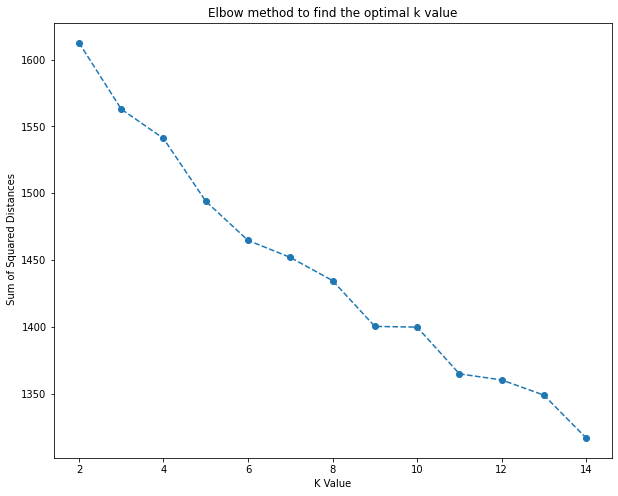

In [22]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(2,15),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.title("Elbow method to find the optimal k value")

# K-Means

In [23]:
num_clusters = 7

km = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
labels = km.fit_predict(X)

In [24]:
print("Top 10 words per cluster")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print(f"Cluster #{i}")
    top_ten_words = [tfidf_vector.get_feature_names()[ind] for ind in order_centroids[i, :10]]
    print(top_ten_words)
    print('\n')

Top 10 words per cluster
Cluster #0
['hunter', 'go', 'hunter biden', 'campaign', 'know', 'via', 'make', 'election', 'win', 'support']


Cluster #1
['americans', 'kamala', 'harris', 'day', 'vote', 'vote joe', 'take', 'election', 'run', 'campaign']


Cluster #2
['president', 'president donald', 'president trump', 'election', 'campaign', 'via', 'former', 'obama', 'rally', 'america']


Cluster #3
['get', 'us', 'use', 'back', 'like', 'right', 'president', 'say', 'try', 'think']


Cluster #4
['people', 'vote', 'black', 'like', 'call', 'time', 'say', 'president', 'many', 'go']


Cluster #5
['say', 'jr', 'trump jr', 'nothing', 'almost', 'almost nothing', 'deaths', 'covid', 'day', 'go']


Cluster #6
['vote', 'vote joe', 'vote donald', 'go', 'want', 'election', 'let', 'president', 'country', 'right']




In [25]:
tweets_df['cluster'] = labels

In [26]:
tweets_df.head()

geo  \
0  NaN   
1  NaN   
2  NaN   
3  NaN   
4  NaN   

                                                                              text  \
0   After the confrontation that cost Walter Wallace Jr. his life set off prote...   
1                               "COVID-19 is still raging. Trump is still lying."    
2   Donald Trump Jr.: "Why aren't they talking about deaths? Oh, oh, because th...   
3  Let‚Äôs not forget who created these problems. Tell Donald Trump his scheme to...   
4   There is no greater supporter of Donald Trump in the world than Mark Zucker...   

              user                   location       Subject          state  \
0    wheresestela1                 New Jersey  Donald Trump     New Jersey   
1  TheFemaleYungin  The Wrong Address, Texas   Donald Trump          Texas   
2  KathrynTomashu1           Northborough, MA  Donald Trump  Massachusetts   
3         ajserino            New Jersey, USA  Donald Trump     New Jersey   
4     SpeakBravely     Twin Cities, Minnesota  Donald Trump      Minnesota   

                                                                      cleaned_text  \
0   after the confrontation that cost walter wallace jr  his life set off prote...   
1                                covid    is still raging  trump is still lying      
2   donald trump jr    why aren t they talking about deaths  oh  oh  because th...   
3  let s not forget who created these problems  tell donald trump his scheme to...   
4   there is no greater supporter of donald trump in the world than mark zucker...   

                                                                    tokenized_text  \
0  [confrontation, cost, walter, wallace, jr, life, set, protests, devolved, ri...   
1                                      [covid, still, raging, trump, still, lying]   
2      [donald, trump, jr, talking, deaths, oh, oh, number, almost, nothing, gott]   
3  [let, forget, created, problems, tell, donald, trump, scheme, undermine, rig...   
4   [greater, supporter, donald, trump, world, mark, zuckerberg, one, done, elect]   

                                                                   lemmatized_text  \
0  [confrontation, cost, walter, wallace, jr, life, set, protest, devolve, riot...   
1                                           [covid, still, rag, trump, still, lie]   
2         [donald, trump, jr, talk, deaths, oh, oh, number, almost, nothing, gott]   
3  [let, forget, create, problems, tell, donald, trump, scheme, undermine, righ...   
4     [greater, supporter, donald, trump, world, mark, zuckerberg, one, do, elect]   

                                                                      stemmed_text  \
0  [confront, cost, walter, wallac, jr, life, set, protest, devolv, riot, loot,...   
1                                           [covid, still, rag, trump, still, lie]   
2             [donald, trump, jr, talk, death, oh, oh, number, almost, noth, gott]   
3  [let, forget, creat, problem, tell, donald, trump, scheme, undermin, right, ...   
4       [greater, support, donald, trump, world, mark, zuckerberg, one, do, elect]   

                                                                 lemmatized_string  \
0     confrontation cost walter wallace jr life set protest devolve riot loot lead   
1                                                  covid still rag trump still lie   
2                     donald trump jr talk deaths oh oh number almost nothing gott   
3  let forget create problems tell donald trump scheme undermine right vote safely   
4                greater supporter donald trump world mark zuckerberg one do elect   

                                                               stemmed_string  \
0       confront cost walter wallac jr life set protest devolv riot loot lead   
1                                             covid still rag trump still lie   
2                    donald trump jr talk death oh oh number almost noth gott   
3  let forget creat problem tell donald trump

# Ploting clusters' size

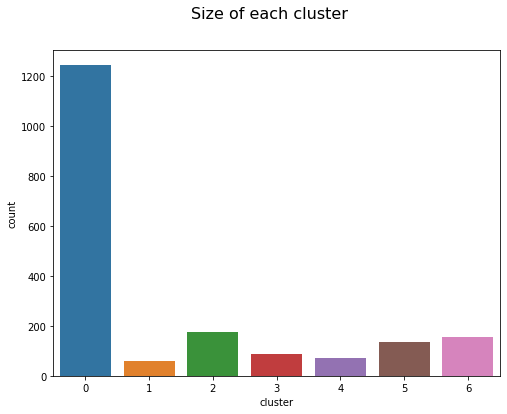

In [27]:
fig = plt.figure(figsize=(8,6))
#plt.style.use('fivethirtyeight')
sns.countplot(x='cluster', data=tweets_df)
fig.suptitle('Size of each cluster', fontsize=16)
fig.savefig('Plots/clusters size.png')

In [28]:
# tweets_df

In [29]:
for c in range(num_clusters):
    print(f"Cluster {c}")
    print(tweets_df[tweets_df['cluster'] == c].text)
    print('\n')

Cluster 0
0        After the confrontation that cost Walter Wallace Jr. his life set off prote...
1                                    "COVID-19 is still raging. Trump is still lying." 
4        There is no greater supporter of Donald Trump in the world than Mark Zucker...
8       It is Friday, October 30, 2020. One citizen, I call for the removal from off...
9                  Donald Trump is a dipshit. The presidency is no place for a dipshit.
                                             ...                                       
1921     üëâJOE BIDEN/ADAM SCHIFF       Both LIARS &amp; TRAITORS!#DemocratsAreEvil‚ÄúI ...
1926     7 Key Corruption Questions Joe Biden Must Answer After FBI Bombshell | Zero...
1927    Hunter Biden Emails CONFIRMED Real! Joe Biden LIED &amp; Nobody Is Covering ...
1928     Donald Trump is just one big #COVID19 super spreader. Our nation needs heal...
1930                               Tony Bobulinski Communicates A Message To Joe Biden 
Name: text, Lengt

### Sentiment Analysis for each cluster

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [31]:
sid = SentimentIntensityAnalyzer()

In [32]:
tweets_df['Polarity'] = tweets_df['stemmed_string'].apply(lambda x: sid.polarity_scores(x))

In [33]:
def sentimentVerdict(polarity):
    #print(polarity['compound'])
    if polarity['compound'] >= 0.05:
        return "Positive"
    elif polarity['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [34]:
tweets_df['Sentiment'] = tweets_df['Polarity'].apply(sentimentVerdict)

Cluster #0


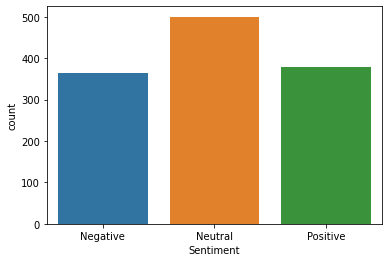

Cluster #1


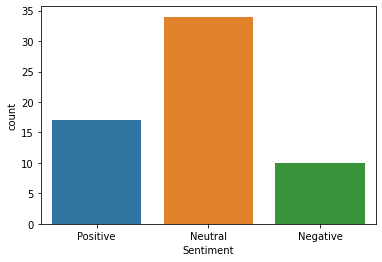

Cluster #2


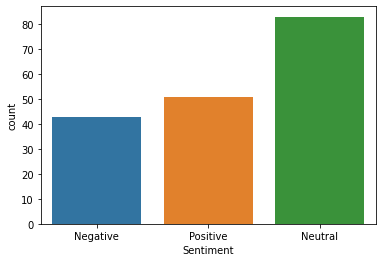

Cluster #3


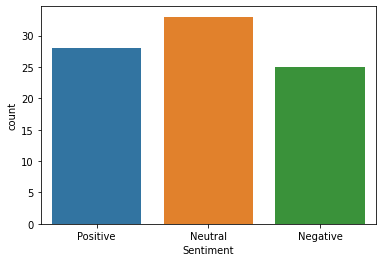

Cluster #4


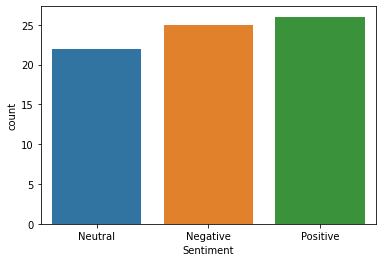

Cluster #5


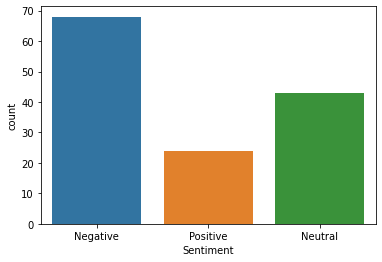

Cluster #6


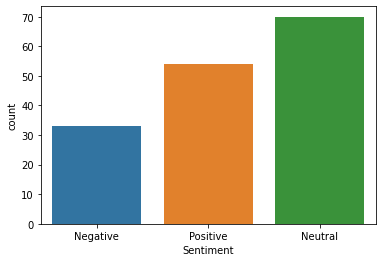

In [35]:
for i in range(num_clusters):
    df = tweets_df[tweets_df['cluster'] == i]
    print(f'Cluster #{i}')
    ax = sns.countplot(x='Sentiment', data=df)
    plt.show()

# Sentiment Analysis using NRC Lexicon

NRC Lexicon is used mostly here to analyze the emotions for cluster 0, as it is obvious correlated with US Elections

In [36]:
! pip install NRCLex

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [37]:
from nrclex import NRCLex

In [38]:
tweets_df['emotion'] = ''

In [39]:
tweets_df


geo  \
0     NaN   
1     NaN   
2     NaN   
3     NaN   
4     NaN   
...   ...   
1928  NaN   
1929  NaN   
1930  NaN   
1931  NaN   
1932  NaN   

                                                                                 text  \
0      After the confrontation that cost Walter Wallace Jr. his life set off prote...   
1                                  "COVID-19 is still raging. Trump is still lying."    
2      Donald Trump Jr.: "Why aren't they talking about deaths? Oh, oh, because th...   
3     Let‚Äôs not forget who created these problems. Tell Donald Trump his scheme to...   
4      There is no greater supporter of Donald Trump in the world than Mark Zucker...   
...                                                                               ...   
1928   Donald Trump is just one big #COVID19 super spreader. Our nation needs heal...   
1929                 Obama was a black voted by all! He reigned for 8 yrs along sid‚Ä¶    
1930                             Tony Bobulinski Communicates A Message To Joe Biden    
1931  After campaigning in 2016 to lift up the ‚Äòforgotten man,‚Äô President Trump ha...   
1932  But yes. Let‚Äôs all run and vote in corrupt, pro-lockdown forever Joe Biden. ...   

                 user                   location       Subject          state  \
0       wheresestela1                 New Jersey  Donald Trump     New Jersey   
1     TheFemaleYungin  The Wrong Address, Texas   Donald Trump          Texas   
2     KathrynTomashu1           Northborough, MA  Donald Trump  Massachusetts   
3            ajserino            New Jersey, USA  Donald Trump     New Jersey   
4        SpeakBravely     Twin Cities, Minnesota  Donald Trump      Minnesota   
...               ...                        ...           ...            ...   
1928     karen_brioso                  Salem, OR     Joe Biden         Oregon   
1929          ArcYuyu     Las Vegas, Nevada, USA     Joe Biden         Nevada   
1930        USMCMIL03                 Texas, USA     Joe Biden          Texas   
1931         JoeBiden             Wilmington, DE     Joe Biden       Delaware   
1932   ZeroIndulgence               San Jose, CA     Joe Biden     California   

                                                                         cleaned_text  \
0      after the confrontation that cost walter wallace jr  his life set off prote...   
1                                   covid    is still raging  trump is still lying      
2      donald trump jr    why aren t they talking about deaths  oh  oh  because th...   
3     let s not forget who created these problems  tell donald trump his scheme to...   
4      there is no greater supporter of donald trump in the world than mark zucker...   
...                                                                               ...   
1928   donald trump is just one big covid   super spreader  our nation needs heali...   
1929                 obama was a black voted by all  he reigned for   yrs along sid     
1930                             tony bobulinski communicates a message to joe biden    
1931  after campaigning in      to lift up the  forgotten man   president trump ha...   
1932  but yes  let s all run and vote in corrupt  pro lockdown forever joe biden  ...   

                                                                       tokenized_text  \
0     [confrontation, cost, walter, wallace, jr, life, set, protests, devolved, ri...   
1                                         [covid, still, raging, trump, still, lying]   
2         [donald, trump, jr, talking, deaths, oh, oh, number, almost, nothing, gott]   
3     [let, forget, created, problems, tell, donald, trump, scheme, undermine, rig...   
4      [greater, supporter, donald, trump, world, mark, zuckerberg, one, done, elect]   
...                                                                               ...   
1928  [donald, trump, one, big, covid, super, spreader, nation, needs, healing, on...   
1929            

In [40]:
for i in range(0,len(tweets_df)):
    tweet = tweets_df['lemmatized_string'][i]
    nrc_tweet = NRCLex(tweet)
    tweets_df['emotion'][i] = nrc_tweet.top_emotions[0][0]

<ipython-input-40-ab633d348f37>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df['emotion'][i] = nrc_tweet.top_emotions[0][0]


In [41]:
tweets_df.head()

geo  \
0  NaN   
1  NaN   
2  NaN   
3  NaN   
4  NaN   

                                                                              text  \
0   After the confrontation that cost Walter Wallace Jr. his life set off prote...   
1                               "COVID-19 is still raging. Trump is still lying."    
2   Donald Trump Jr.: "Why aren't they talking about deaths? Oh, oh, because th...   
3  Let‚Äôs not forget who created these problems. Tell Donald Trump his scheme to...   
4   There is no greater supporter of Donald Trump in the world than Mark Zucker...   

              user                   location       Subject          state  \
0    wheresestela1                 New Jersey  Donald Trump     New Jersey   
1  TheFemaleYungin  The Wrong Address, Texas   Donald Trump          Texas   
2  KathrynTomashu1           Northborough, MA  Donald Trump  Massachusetts   
3         ajserino            New Jersey, USA  Donald Trump     New Jersey   
4     SpeakBravely     Twin Cities, Minnesota  Donald Trump      Minnesota   

                                                                      cleaned_text  \
0   after the confrontation that cost walter wallace jr  his life set off prote...   
1                                covid    is still raging  trump is still lying      
2   donald trump jr    why aren t they talking about deaths  oh  oh  because th...   
3  let s not forget who created these problems  tell donald trump his scheme to...   
4   there is no greater supporter of donald trump in the world than mark zucker...   

                                                                    tokenized_text  \
0  [confrontation, cost, walter, wallace, jr, life, set, protests, devolved, ri...   
1                                      [covid, still, raging, trump, still, lying]   
2      [donald, trump, jr, talking, deaths, oh, oh, number, almost, nothing, gott]   
3  [let, forget, created, problems, tell, donald, trump, scheme, undermine, rig...   
4   [greater, supporter, donald, trump, world, mark, zuckerberg, one, done, elect]   

                                                                   lemmatized_text  \
0  [confrontation, cost, walter, wallace, jr, life, set, protest, devolve, riot...   
1                                           [covid, still, rag, trump, still, lie]   
2         [donald, trump, jr, talk, deaths, oh, oh, number, almost, nothing, gott]   
3  [let, forget, create, problems, tell, donald, trump, scheme, undermine, righ...   
4     [greater, supporter, donald, trump, world, mark, zuckerberg, one, do, elect]   

                                                                      stemmed_text  \
0  [confront, cost, walter, wallac, jr, life, set, protest, devolv, riot, loot,...   
1                                           [covid, still, rag, trump, still, lie]   
2             [donald, trump, jr, talk, death, oh, oh, number, almost, noth, gott]   
3  [let, forget, creat, problem, tell, donald, trump, scheme, undermin, right, ...   
4       [greater, support, donald, trump, world, mark, zuckerberg, one, do, elect]   

                                                                 lemmatized_string  \
0     confrontation cost walter wallace jr life set protest devolve riot loot lead   
1                                                  covid still rag trump still lie   
2                     donald trump jr talk deaths oh oh number almost nothing gott   
3  let forget create problems tell donald trump scheme undermine right vote safely   
4                greater supporter donald trump world mark zuckerberg one do elect   

                                                               stemmed_string  \
0       confront cost walter wallac jr life set protest devolv riot loot lead   
1                                             covid still rag trump still lie   
2                    donald trump jr talk death oh oh number almost noth gott   
3  let forget creat problem tell donald trump

### Ploting count emotions for each cluster

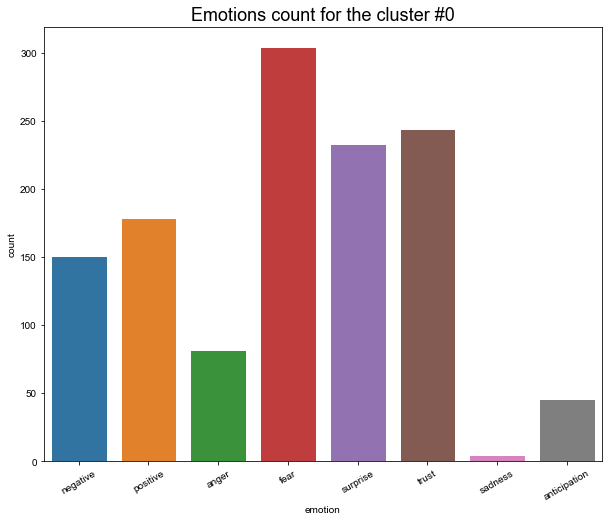

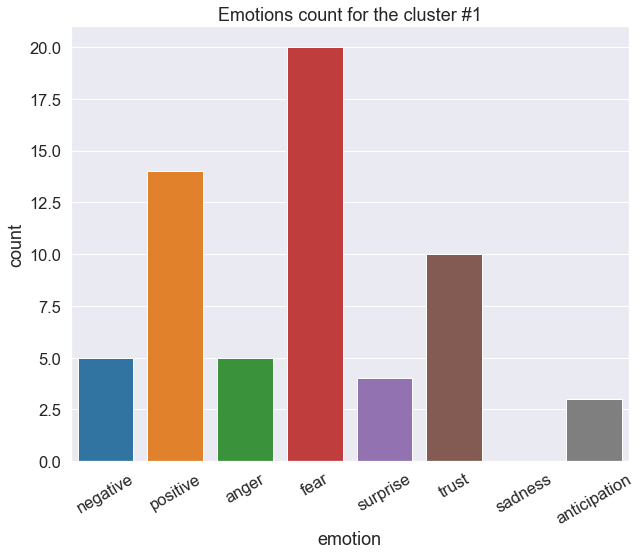

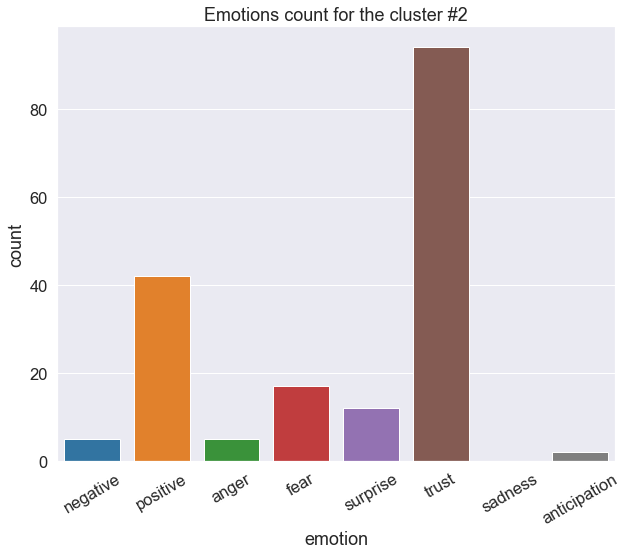

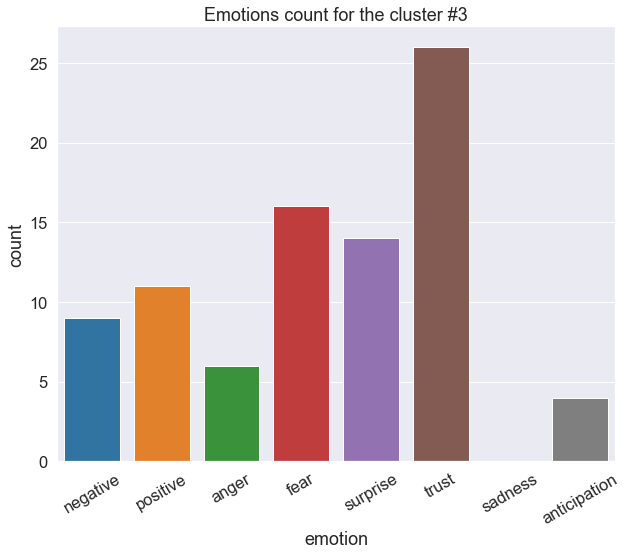

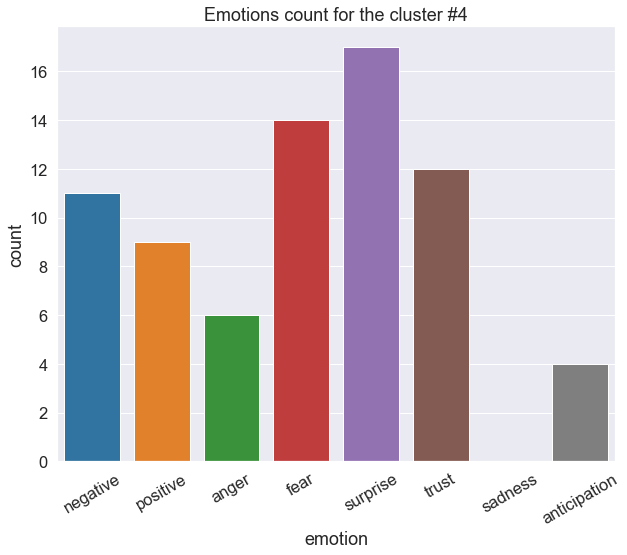

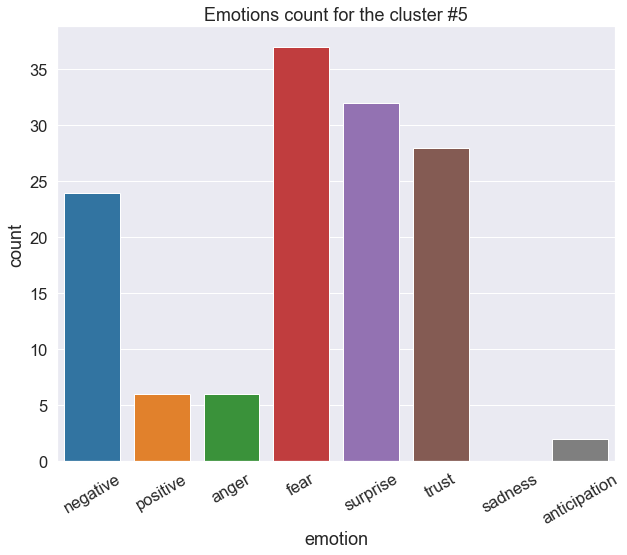

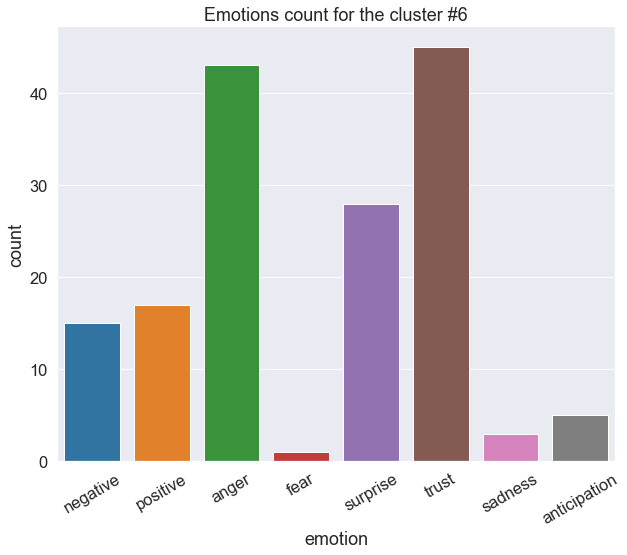

In [42]:
for c in range(num_clusters):
    df = tweets_df[tweets_df['cluster'] == c]
    fig, ax = plt.subplots(figsize = (10,8))
    plt.xticks(rotation=30)
    sns.set(font_scale=1.5)
    ax = sns.countplot(x='emotion', data=df, order=['negative', 'positive', 'anger', 'fear', 'surprise', 'trust', 'sadness', 'anticipation'], palette='tab10')
    ax.set_title(f"Emotions count for the cluster #{c}")
    plt.show()
    fig.savefig(f'Images/emotions_cluster{c}.png')

## Analyze cluster #0

In [43]:
df = tweets_df[(tweets_df['cluster'] == 0)]

In [44]:
df.shape

(1244, 16)

In [45]:
tfidf_vector = TfidfVectorizer(max_df=0.3, min_df=10, stop_words=stopwords_eng, ngram_range=(1,2), max_features=1000, use_idf=True, smooth_idf=True)

X_sub  = tfidf_vector.fit_transform(df['lemmatized_string'])

Choosing K Value

In [46]:
ssd = []

for k in range(1,15):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(X_sub)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow method to find the optimal k value')

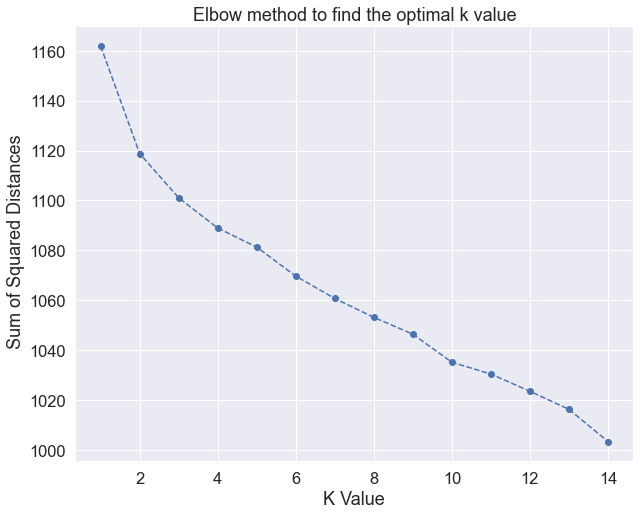

In [47]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,15),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")
plt.title("Elbow method to find the optimal k value")

In [48]:
num_subclusters = 5

km = KMeans(n_clusters=num_subclusters, init='k-means++', random_state=42)
labels = km.fit_predict(X_sub)

In [49]:
print("Top 10 words per sub-cluster")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_subclusters):
    print(f"Sub-cluster #0.{i}")
    top_ten_words = [tfidf_vector.get_feature_names()[ind] for ind in order_centroids[i, :10]]
    print(top_ten_words)
    print('\n')

Top 10 words per sub-cluster
Sub-cluster #0.0
['go', 'campaign', 'know', 'family', 'would', 'state', 'make', 'support', 'new', 'america']


Sub-cluster #0.1
['donald', 'donald trump', 'lil', 'via', 'lil wayne', 'wayne', 'election', 'endorse', 'support', 'take']


Sub-cluster #0.2
['lie', 'son', 'stand', 'like', 'rally', 'tell', 'need', 'come', 'via', 'know']


Sub-cluster #0.3
['hunter', 'hunter biden', 'business', 'email', 'deal', 'amp', 'report', 'greenwald', 'criminal', 'corruption']


Sub-cluster #0.4
['win', 'white', 'biden win', 'house', 'white house', 'make', 'next', 'week', 'secretary', 'want']




In [50]:
df['sub-cluster'] = labels

<ipython-input-50-1c32b71b470c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sub-cluster'] = labels


Text(0.5, 0.98, 'Size of each cluster')

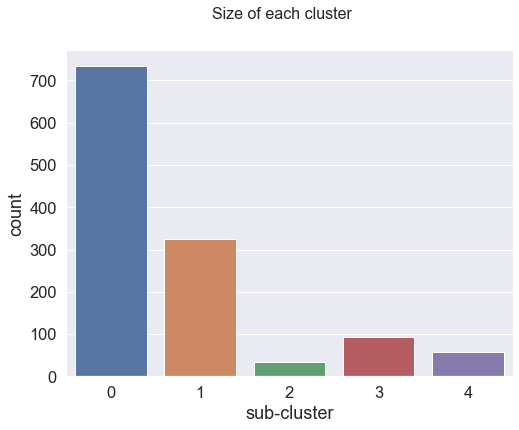

In [51]:
fig = plt.figure(figsize=(8,6))
#plt.style.use('fivethirtyeight')
sns.countplot(x='sub-cluster', data=df)
fig.suptitle('Size of each cluster', fontsize=16)
#fig.savefig('Plots/clusters size.png')

In [52]:
for c in range(num_subclusters):
    print(f"Sub-cluster {c}")
    print(df[df['sub-cluster'] == c].text)
    print('\n')

Sub-cluster 0
0        After the confrontation that cost Walter Wallace Jr. his life set off prote...
8       It is Friday, October 30, 2020. One citizen, I call for the removal from off...
10       Trump is going to try to make his re-election his final giant con, losing t...
16       It is Friday, October 30, 2020. One citizen, I call for the removal from of...
36       "17" posts today about the "Great Reset", which is a plan to enslave all hu...
                                             ...                                       
1917                                                     joe biden after tweeting this 
1919     These are the folks that Joe Biden was in business with. Now FBI is investi...
1921     üëâJOE BIDEN/ADAM SCHIFF       Both LIARS &amp; TRAITORS!#DemocratsAreEvil‚ÄúI ...
1926     7 Key Corruption Questions Joe Biden Must Answer After FBI Bombshell | Zero...
1930                               Tony Bobulinski Communicates A Message To Joe Biden 
Name: text, L

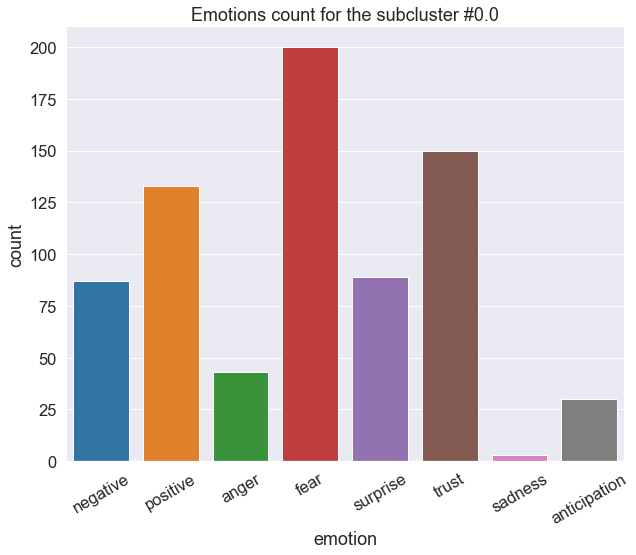

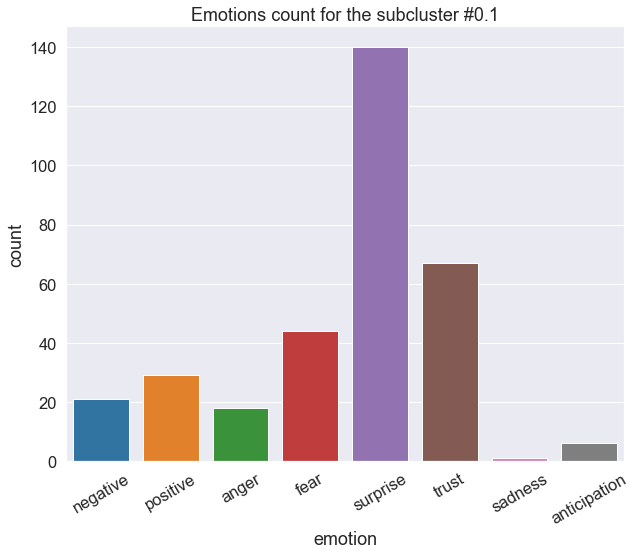

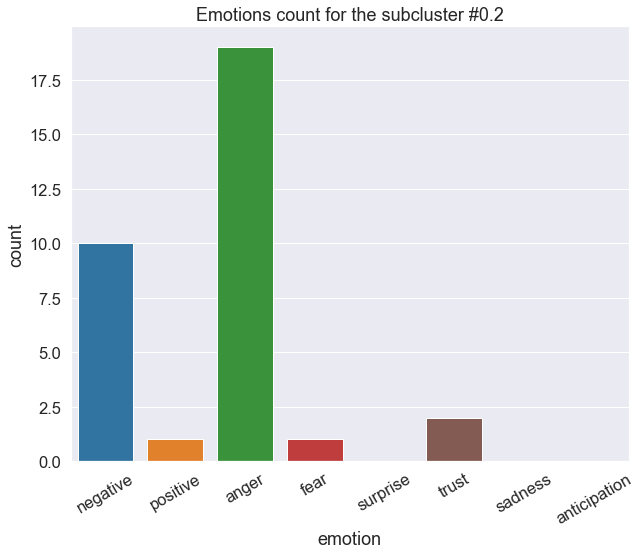

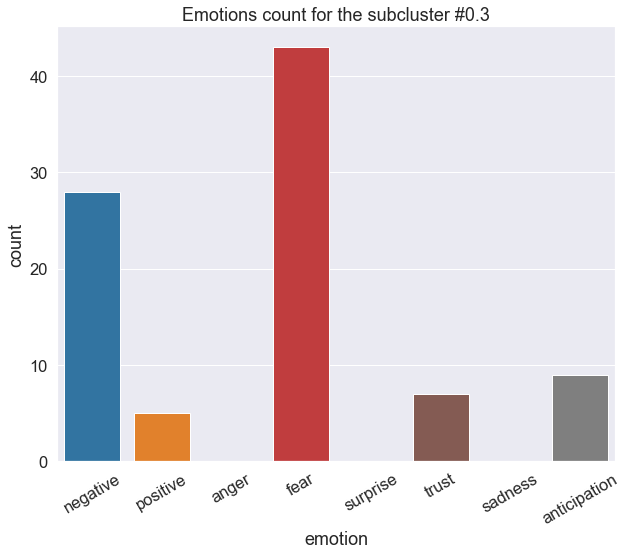

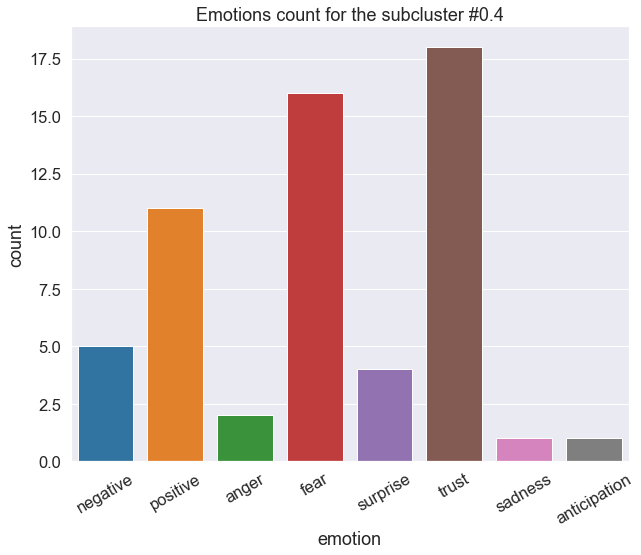

In [53]:
for c in range(num_subclusters):
    df2 = df[df['sub-cluster'] == c]
    fig, ax = plt.subplots(figsize = (10,8))
    plt.xticks(rotation=30)
    sns.set(font_scale=1.5)
    ax = sns.countplot(x='emotion', data=df2, order=['negative', 'positive', 'anger', 'fear', 'surprise', 'trust', 'sadness', 'anticipation'], palette='tab10')
    ax.set_title(f"Emotions count for the subcluster #0.{c}")
    plt.show()
    fig.savefig(f'Plots/emotions_subcluster 0.{c}.png')

# LDA

In [70]:
lda = LatentDirichletAllocation(n_components=12, random_state=42)

In [71]:
topics = lda.fit_transform(X)

In [72]:
for index,topic in enumerate(lda.components_):
    print(f"The top 10 words for topic #{index}")
    print([tfidf_vector.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

The top 10 words for topic #0
['like', 'us', 'show', 'president', 'elect', 'donald trump', 'promise', 'know', 'help', 'make']


The top 10 words for topic #1
['support', 'poll', 'help', 'know', 'us', 'elect', 'election', 'show', 'donald trump', 'white']


The top 10 words for topic #2
['election', 'go', 'promise', 'support', 'make', 'poll', 'donald trump', 'help', 'know', 'show']


The top 10 words for topic #3
['know', 'go', 'elect', 'us', 'show', 'promise', 'help', 'make', 'election', 'donald trump']


The top 10 words for topic #4
['elect', 'make', 'election', 'promise', 'support', 'poll', 'help', 'know', 'show', 'donald trump']


The top 10 words for topic #5
['support', 'know', 'show', 'white', 'poll', 'election', 'make', 'help', 'donald trump', 'us']


The top 10 words for topic #6
['promise', 'poll', 'help', 'show', 'support', 'president', 'know', 'make', 'donald trump', 'like']


The top 10 words for topic #7
['make', 'go', 'help', 'election', 'show', 'support', 'white', 'promi